# Python for Neuroscientists Lesson 8
## Object-Oriented Programming (OOP)

### Introduction

#### OOP vs. Functional Programming

What is **object-oriented programming (OOP** for short)? To understand this question, let's consider what isn't OOP - **functional programming**.

In [1]:
#imports
from datetime import date
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd

This is functional-style code - take just a few minutes to guess what this will output.

In [2]:
abhi = {'name': 'Abhi',
        'units': [7,8,9],
        'cblind': True}

sam = {'name': 'Sam',
        'units': [4,5,6],
        'cblind': False}

def print_teacher_info(teacher):
    if teacher['cblind']:
        cblind = 'is'
    else:
        cblind = 'is NOT'
    print(teacher['name'] + ' is teaching units ' + str(teacher['units']) + ' and ' + cblind + ' colorblind!')
    
print_teacher_info(abhi)
print_teacher_info(sam)

Abhi is teaching units [7, 8, 9] and is colorblind!
Sam is teaching units [4, 5, 6] and is NOT colorblind!


In [ ]:
#Abhi is teaching units 7, 8, 9 and is colorblind!

Now, let's look at an OOP example of the same code.

In [3]:
class Teacher:
    
    def __init__(self, name, units, colorblind):
        self.name = name
        self.units = units
        self.colorblind = colorblind
        
    def print_teacher_info(self):
        if self.colorblind:
            cblind = 'is'
        else:
            cblind = 'is NOT'
        print(self.name + ' is teaching units ' + str(self.units) + ' and ' + cblind + ' colorblind!')
        
abhi = Teacher('Abhi', [7,8,9], True)
sam = Teacher('Sam', [4,5,6], False)
abhi.print_teacher_info()
sam.print_teacher_info()

Abhi is teaching units [7, 8, 9] and is colorblind!
Sam is teaching units [4, 5, 6] and is NOT colorblind!


#### What is OOP?
At it's root, OOP is about encapsulation and modularity. We'll go over the specifics in the lesson today!


As you can see, it is possible to use both functional and OOP coding styles in Python. Today, we're going to go over exactly what OOP is, what it's useful for, and how to read OOP code.

### Classes and objexts

We've actually already used OOP before! For example, does the code below look familiar?

In [4]:
df = pd.DataFrame([1,2,3])

In this code, df is an **object**, defined in the DatFrame **class**. Confusing?

Let's use an analogy: the class is a recipe, and the object is the food you make using that recipe.
In fact, almost everything in Python is an object. For example:

In [5]:
a = 3
b = int(3)
print(type(a))
print(type(b))

<class 'int'>
<class 'int'>


See how it says class? What do we think `type(df)` will return?

In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


#### Example class code

Now let's go over how to use classes and objects in detail. Run the code below to load in our custom `Experiment` class

In [25]:
#Run this code to load the class

class Experiment:
        
    def __init__(self, path_to_expt, expt_date, experimenter, time):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        self.expt_time = time
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        print('Time: ', self.expt_time)
        
    def return_data(self):
        return 'There is no data here for now'

Let's pause to go through what's inside the class code. First, we have a function called `__init__`. This is a **constructor**, and it will be run anytime you create an object from this class. The constructor is a place to put commands that you create an object: for example, here we assign some attributes (or variables) associated with out class.

Let's see the constructor in action by creating an object First, we create an object named `expt`, by calling `Experiment` and providing information. This process is called **instantiation**.

In [26]:
expt = Experiment('experiment_file.csv', '031322', 'Abhi', '1')

Constructor called


What happened here is we created an object called `expt` from Experiment, which automatically ran the constructor. Notice that when we instantiated our object, we provided information to the function call, just like you would with any other function. We can access this data, as in our constructor we save the data to the object using the **self** command.

In [10]:
expt.expt_date

'031322'

As a quick aside, you've seen attributes before - can you think of an example

We can also call functions within the class. For example:

In [27]:
expt.print_expt_info()

Path:  experiment_file.csv
Experiment Date:  031322
Experimenter:  Abhi
Generation Date:  2022-11-02
Time:  1


What happens if we try to call the function directly?

In [15]:
Experiment.print_expt_info()
#Experiment.print_expt_info()

TypeError: Experiment.print_expt_info() missing 1 required positional argument: 'self'

### Problem 1

Modify the code from the cells above to add another argument to the constructor - it can be whatever you want it to be. Then, create an object of your class, and call  `print_expt_info`.

### Writing our own class

Great, now let's try and write our own class! Let's make sure that one of the functions modifies an attribute of the object.                            

In [28]:
class Bagel_Orders:

    def __init__(self, name, bagel_type, cream_cheese, toppings):
        self.name = name
        self.bagel_type = bagel_type
        self.cream_cheese = cream_cheese
        self.toppings = toppings
        print ('Constructor called')

    def print_bagel_order(self):
        print ('Order name: ', self.name)
        print ('Bagel type: ', self.bagel_type)
        print ('Cream cheese choice: ', self.cream_cheese)
        print ('Toppings: ', self.toppings)



In [29]:
order1 = Bagel_Orders('Zelie','Everything','Scallion','Capers, onions')
order1.print_bagel_order()

Constructor called
Order name:  Zelie
Bagel type:  Everything
Cream cheese choice:  Scallion
Toppings:  Capers, onions


#### Making multiple objects
A class can support many independent objects! Back to the analogy: if I have two recipes for a pumpkin pie, I can make two pumpkin pies, and if I put whipped cream on one, then it won't magically appear on the other.

Let's make two objects from our new class, and see if modifying one affects the other. 

### Inheritance and polymorphism

As I mentioned earlier, one of the important features of OOP is modularity. Let's go back to the recipe analogy I mentioned earlier. Say we had a recipe for cooking a cake, in general. What if we wanted to bake a vanilla cake? I could write a totally new recipe, but that would be redundant. Instead, what I could do is simply change the section where I add flavorings to the cake mix.

Inheritance is exactly this concept: you can create child classes that inherit from a parent class. Let's see what this means using an example.

In [30]:
#Run this code to load the class
class Experiment:
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        
    def return_data(self):
        return 'There is no data here for now'

Now, we have a small child class that **inherits** from and **extends** a parent class. Notice the syntax: we just place the name of the parent class in the parenthes at the beginning of the class.

In [31]:
class ImagingExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, frame_rate):
        self.frame_rate = frame_rate
        #Super refers to our parent class
        print('Imaging constructor called')
        super().__init__(path_to_expt, expt_date, experimenter)
    
    #This is a new function!
    def print_frame_rate(self):
        print('Frame Rate: {} Hz'.format(self.frame_rate))
    
    #This is an old function we modified!
    def return_data(self):
        return 'Pretend that I am imaging data' 

Let's start by creating an object of our new class: anyone remember how to do this?

In [32]:
imaging_expt = ImagingExperiment('experiment_file.csv', '031122', 'Abhi', 30)

Imaging constructor called
Constructor called


A few things to unpack: <br>
1) Notice how we are providing one more argument to the constructor. Let's follow this number.
2) See how the imaging constructor is called first, and then the constructor for the parent experiment class?
3) What do we think the type of our new object will be?

In [33]:
type(imaging_expt)

__main__.ImagingExperiment

Now, let's understand these new functions.

In [34]:
imaging_expt.print_frame_rate()

Frame Rate: 30 Hz


That seems self-explanatory - that's a new function we added. Do the old ones still work?

In [35]:
imaging_expt.print_expt_info()

Path:  experiment_file.csv
Experiment Date:  031122
Experimenter:  Abhi
Generation Date:  2022-11-02


Ok, what about return_data? What do we think it will output?

In [36]:
imaging_expt.return_data()

'Pretend that I am imaging data'

See how we've created a new version of `return_data`? This is called polymorphism - a single function can take many forms in OOP. This is useful, because often you want a child class to subtly modify or add to a parent class. Think about a vegan cake - the general steps might be the same, but you'd want to go back and modify some of the tasks you're peforming to include different ingredients.

### Problem 2

Just as we did with ImagingExperiment, create a class called BehaviorExperiment that inherits from Experiment. In this class, please take in a `behavior_task` variable instead of `frame_rate`. In addition, please write a modified `return_data` function to print your behavior task.

In [53]:
class BehaviorExperiment(Experiment):

    def __init__(self, path_to_expt, expt_date, experimenter, behavior_task):
        self.behavior_task = behavior_task
        super().__init__(path_to_expt, expt_date, experimenter)

    def print_behavior_task(self):
        print('Behavior Task: {} Type'.format(self.behavior_task))
    
    def return_data(self):
        return self.print_behavior_task()


In [54]:
test3 = BehaviorExperiment('test.csv','202029','Zelie','Running')
test3.return_data()

Constructor called
Behavior Task: Running Type


### Abstraction
Let us extend some of these ideas a little further. What if you wanted to create a parent class that was really a template of a class? First, let me provide an example of why you would want to do this. Let's take the example of a recipe for making a cake (your parent class). You might want to create a recipe, and include a step to put in all your flavorings, but leave the implementation of these flavorings up to the user. In your recipe, you would reference adding your flavorings, but you would not specify what to add. In a similar way, abstraction allows you to create methods that you might use via other methods in your parent class, but wait until creating child classes to implment their specifics. Let's see what this entails before considering a more real-world example.

In [55]:
#Run this code to load the class
class Experiment(ABC):
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
    
    @abstractmethod
    def print_expt_info(self):
        pass

Check out that @abstractmethod tag we used: this will tell python that this is an abstract method that can not be used on its own. Let's see what happens if we try and instantiate an experiment object. In addition, we inherit from ABC, but let's not delve too deeply into that right now. Ask after class if you're curious!

In [56]:
expt = Experiment('12.csv', '12312312', 'bob')
expt.print_expt_info()

TypeError: Can't instantiate abstract class Experiment with abstract method print_expt_info

Doesn't work! Let's try creating a child class that implements the abstract method.

In [57]:
class MolecularExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, gene):
        self.gene = gene
        Experiment.__init__(self, path_to_expt, expt_date, experimenter)
    
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        print('Gene: ', self.gene)

In [58]:
imaging_expt = MolecularExperiment('experiment_file.csv', '031322', 'Abhi', 'c-Fos')
imaging_expt.print_expt_info()

Path:  experiment_file.csv
Experiment Date:  031322
Experimenter:  Abhi
Generation Date:  2022-11-02
Gene:  c-Fos


What happens if you try and run the method we've left empty directly?

To sum things up, OOP provides 1) a user-friendly way to organize code 2) modularity and 3) a simple way to work with similar but distinct data. Of course, OOP is not without issues; OOP can obfuscate and hide what's going on under the hood, and sometimes objects can be modified without you really knowing that you were modifying any object.

### Let's take a look at a package that has tons of OOP!

In [59]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
%matplotlib inline

In [60]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

This is the code to focus on, but let's run through everything first

In [67]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0.5, 1.0, 'PCA of IRIS dataset')

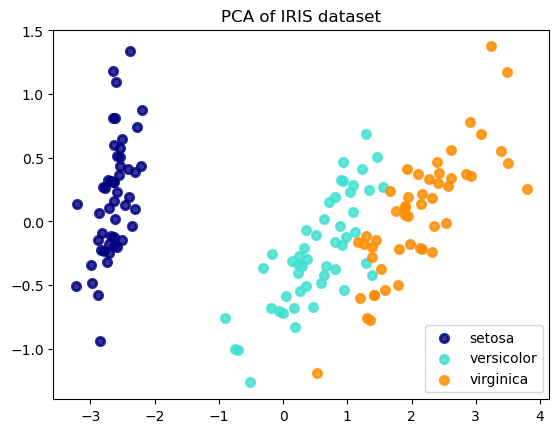

In [62]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")